In [1]:
import myServices as ms
import models as md

import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc, roc_auc_score, f1_score
import joblib

datasets/dataset4MLP/MLP_allVs_basin1Light_Clean_Training.csv
percentage
   DLSOL4R150  DLSOL5R150  DLSOL5R200  FAProx_01  FAProx_025     FAcc  \
0         0.0         0.0         0.0  725.43091   174.75125  0.00000   
1         0.0         0.0         0.0  709.11920   171.02631  0.00000   
2         0.0         0.0         0.0  737.05499   176.23280  0.00001   
3         0.0         0.0         0.0  721.00623   172.53986  0.00000   
4         0.0         0.0         0.0  749.03271   177.79201  0.00000   

   visibility    slope  elevation  
0     0.02455  1.97503  174.32889  
1     0.02849  7.28373  173.66133  
2     0.02651  3.28983  173.39836  
3     0.02117  0.36284  172.95361  
4     0.00134  0.19720  172.93945  
Train balance
(1370466, {0: 'Class_count: 1327657  for  0.9688  percent', 1: 'Class_count: 8130  for  0.0059  percent', 5: 'Class_count: 34679  for  0.0253  percent'})
Iteration 1, loss = 0.13463664
Validation score: 0.971477
Iteration 2, loss = 0.09678826
Validation scor

/Users/abdielfer/DESS/Internship2022/RNCanWork/FloodProbabRNCanAbd/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/abdielfer/DESS/Internship2022/RNCanWork/FloodProbabRNCanAbd/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


UNIQUE CLASSES:  [0 1 5]
Accuraci_score:  0.9704755916314165
F1_macroAverage:  0.4539359358674299
F1_microAverage:  0.9704755916314165
ROC_AUC one_vs_all:  {0: 0.6714374119850677, 1: 0.5, 5: 0.6856021298501717}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x15007a640>, 'activation': 'relu', 'hidden_layer_sizes': 1000, 'n_iter': 36}


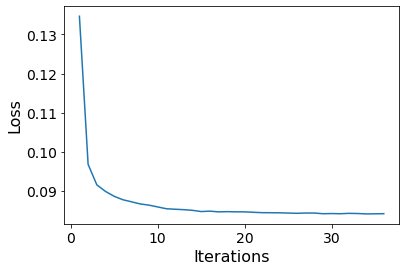

In [24]:
####.  Training TEST

readPath = 'datasets/dataset4MLP/'
trainingPath = readPath + 'MLP_allVs_basin1Light_Clean_Training.csv'
# dataset = pd.read_csv(trainingPath, index_col = None)
params = {'random_state':50, 'hidden_layer_sizes':(1000),
                'early_stopping':True,'verbose':True,
                'tol':0.00010,'validation_fraction':0.1,'warm_start':True}
mlpc = md.implementingMLPCalssifier(trainingPath,'percentage',params)
mlpc.fitMLPClassifier()
mlpc.plotLossBehaviour()

mlpClassifier = mlpc.getMLPClassifier()

#Validating un unseen dataset
validation = readPath + 'MLP_basin1Light_Clean_VsAll_Test.csv'
x_val,y_val = ms.importDataSet(validation, 'percentage')
prediction = ms.makePredictionToImportAsSHP(mlpClassifier, x_val, y_val, 'percentage')

## Compute metrics
X = x_val.copy()
X.drop(['percentage','x_coord','y_coord','prediction'], axis=1, inplace=True)
metrics = md.computeClassificationMetrics(mlpClassifier,X,y_val)
print(mlpc.get_logsDic())

In [ ]:
#### Explore model complexity vs performance on unseening basin. ####

'''
hidden_layer_sizes=[100,100] earlyStop True
ROC_AUC one_vs_all:  {0: 0.6228742547616204, 1: 0.4999938829459356, 5: 0.6399651931990683}
_____
hidden_layer_sizes=[100,100] earlyStop False, Epochs = 45  IT´s NOT Better!!
_____
hidden_layer_sizes=[1000,1000] earlyStop True: 
ROC_AUC one_vs_all:  {0: 0.6125170698989215, 1: 0.49991965918329867, 5: 0.6254008937160408}
_____
hidden_layer_sizes=(150,100,50), earlyStop True
ROC_AUC one_vs_all:  {0: 0.5637879768798603, 1: 0.499983295736978, 5: 0.5729145574443686}
_____
hidden_layer_sizes=(200,150,100,50), earlyStop True
ROC_AUC one_vs_all:  {0: 0.6308461923938076, 1: 0.5000229432884631, 5: 0.6420998385622048}
______
hidden_layer_sizes=(200), earlyStop True
ROC_AUC one_vs_all:  {0: 0.654696371004719, 1: 0.5, 5: 0.6698573647187008}
______
hidden_layer_sizes=(278), earlyStop True
ROC_AUC one_vs_all:  {0: 0.6739319215706956, 1: 0.5, 5: 0.687665244202922}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x15007a490>, 
'activation': 'relu', 'n_iter': 42}
_____
ROC_AUC one_vs_all:  {0: 0.6434244793232012, 1: 0.4999990589147593, 5: 0.6580651931595939}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x14ffd44f0>, 
'activation': 'relu', 'hidden_layer_sizes': 279, 'n_iter': 26}
______
###.  BEST  #####
'hidden_layer_sizes': 280
ROC_AUC one_vs_all:  {0: 0.725413336714216, 1: 0.5, 5: 0.739561606898303}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x11115f880>, 
'activation': 'relu', 'n_iter': 32}
____
'hidden_layer_sizes': 281
ROC_AUC one_vs_all:  {0: 0.687069575713219, 1: 0.5, 5: 0.7018609166432868}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x150412280>, 
'activation': 'relu', 'n_iter': 32}
_____
'hidden_layer_sizes': 282
ROC_AUC one_vs_all:  {0: 0.7091773125462395, 1: 0.5025620860825134, 5: 0.7231809060694995}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x14ffd43a0>, 
'activation': 'relu', 'hidden_layer_sizes': 282, 'n_iter': 32}
______
hidden_layer_sizes=(300), earlyStop True
ROC_AUC one_vs_all:  {0: 0.6712874739483707, 1: 0.5, 5: 0.6903606434727337}
_____
hidden_layer_sizes=(350), earlyStop True
ROC_AUC one_vs_all:  {0: 0.6634314979751396, 1: 0.5, 5: 0.6743297808926096}
_____
hidden_layer_sizes=(400), earlyStop True
ROC_AUC one_vs_all:  {0: 0.6735994541470123, 1: 0.5, 5: 0.6886358464246944}
____
hidden_layer_sizes = 500
ROC_AUC one_vs_all:  {0: 0.6413823150589926, 1: 0.5, 5: 0.6570811552402528}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x15057a070>, 
'activation': 'relu', 'n_iter': 27}
____
hidden_layer_sizes = 600, 
ROC_AUC one_vs_all:  {0: 0.6629380284306443, 1: 0.5, 5: 0.678143405544148}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x150143cd0>, 
'activation': 'relu', 'n_iter': 29}
____
hidden_layer_sizes' = 690
ROC_AUC one_vs_all:  {0: 0.6720056649260504, 1: 0.5, 5: 0.684244579416157}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x150528610>, 
'activation': 'relu', 'n_iter': 27}
____
###. to check####
hidden_layer_sizes = 700
ROC_AUC one_vs_all:  {0: 0.709241541871279, 1: 0.5, 5: 0.7225650719554007}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x1501435e0>, 
'activation': 'relu', 'n_iter': 34}
____
hidden_layer_sizes = 710
ROC_AUC one_vs_all:  {0: 0.6748179832958519, 1: 0.5, 5: 0.6911761628358285}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x1500fea30>, '
activation': 'relu', 'n_iter': 40}
____
hidden_layer_sizes = 800,
ROC_AUC one_vs_all:  {0: 0.6665697027100255, 1: 0.5, 5: 0.6828522971609348}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x150145f70>,
'activation': 'relu', 'n_iter': 34}
____
hidden_layer_sizes = 900
ROC_AUC one_vs_all:  {0: 0.6361267478738225, 1: 0.5, 5: 0.6481332615660654}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x1500fe460>, 
'activation': 'relu','n_iter': 33}
_____
hidden_layer_sizes = 1000
ROC_AUC one_vs_all:  {0: 0.6714374119850677, 1: 0.5, 5: 0.6856021298501717}
{'optimizer': <sklearn.neural_network._stochastic_optimizers.AdamOptimizer object at 0x15007a640>, 
'activation': 'relu', 'n_iter': 36}
'''  
prediction.to_csv(('outputs/'+ 'MLP_basin1Light_firstResult_HL280.csv'),index=None)

In [ ]:
# to compute ececution time do: 
# with timeit():
#     # your code, e.g., 
class timeit(): 
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('runtime: {}'.format(self.datetime.now() - self.tic))

## Importing and manipulating datasets

In [ ]:
sklearn.metrics.get_scorer_names()

In [ ]:
### Cleaning basin1DataSet 
dataSetPath = 'datasets/datasetBasin1.csv'
basinDataSet = pd.read_csv(dataSetPath, index_col = None)
# basin1Light = pd.read_csv('datasetBasin1_NoDataFree.csv', index_col = None)
# print(basinDataSet.info())
# basinDataSet.describe()

In [ ]:
basinDataSet.isna().any()

In [ ]:
colNames = ['percentage','DLSOL5R200', 'DLSOL4R150', 'DLSOL5R150']
for col in colNames: 
    basinDataSet[col].fillna(0,inplace=True)

In [ ]:
basinDataSet.dropna(subset=['slope'],inplace=True)

In [ ]:
basinDataSet.drop(['fid'], axis =1, inplace=True)

In [ ]:
basinDataSet.isna().sum()

In [ ]:
#### NOrmalize Flow Accumulation
basinDataSet['FAcc'] = (basinDataSet['FAcc']- basinDataSet['FAcc'].min())/(basinDataSet['FAcc'].max()-basinDataSet['FAcc'].min())


In [ ]:
### Replacing QGIS NoData value(-9999) with 0 
repalcer  = basinDataSet['FAProx_01'].to_numpy()
basinDataSet['FAProx_01'] = [0 if repalcer[j] == -9999 else repalcer[j] for j in range(len(repalcer))]                                                                                                                         
                                                                                                                          

In [ ]:
## Transform a column datatype
repalcer  = basinDataSet['percentage'].to_numpy().astype('int')
basinDataSet.loc[:,'percentage'] = repalcer

In [ ]:
basinDataSet.describe()

In [ ]:
basinDataSet.to_csv('datasets/basin1_FirstFeatureSet_Clean.csv', index=None)

In [ ]:
ds = DS.head(5)
s = {}
s['Datas'] = ds
print(s)

## Proportional Split 

In [ ]:
## Stratified Split
from sklearn.model_selection import StratifiedShuffleSplit

X,Y = ms.importDataSet('datasets/basin1_FirstFeatureSet_Clean.csv', 'percentage')
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in sss.split(X, Y):
    print("TRAIN:", train_index.size, "TEST:", test_index.size)
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

In [ ]:
## Describing training set
print(len(X_train['elevation']), len(y_train) )
trainCount = Counter(y_train)
print(trainCount)

In [ ]:
#####    Creating training set     #####
X_train.loc[:,'percentage'] = y_train
X_train.head()


In [ ]:
## Removing coordinates from training set
X_train.drop(['x_coord','y_coord'], axis =1, inplace=True)
X_train.head()

In [ ]:
X_train.to_csv('datasets/basin1_FirstFeatureSet_Clean_Training.csv', index=None)

In [ ]:
#####. Creating Test set
print(X_test.head())
X_test.loc[:,'percentage'] = y_test
print(X_test.head())
print(X_test.info())
testCount = Counter(X_test['percentage'])
print(f"testCount:  {testCount}")


In [ ]:
X_test.to_csv('datasets/basin1_FirstFeatureSet_Clean_Test.csv', index=None)

In [ ]:
## This proportions are the reason why a sample_weight of 0.01 for the majority class give best results for regression
totalTrain = sum([trainCount[0], trainCount[1], trainCount[5]]) 
totalValidation = sum([testCount[0], testCount[1], testCount[5]])
print(f"total Train samples: {totalTrain},  total Validation samples: {totalValidation}")
print("Summary of traning and test dataset class balance")
print(f"Training Set:", '\n', "Class 0: %.3f" %(trainCount[0]/totalTrain), " Class 1: %.4f" %(trainCount[1]/totalTrain), "Class 5: %.4f"%(trainCount[5]/totalTrain))
print("Testing Set:", '\n', "Class 0: %.3f" %(testCount[0]/totalValidation)," Class 1: %.4f" %(testCount[1]/totalValidation),  "Class 5: %.4f"%(testCount[5]/totalValidation))



In [ ]:
model = ms.loadModel('./outputs/2022-08-05/00-35-58/2208050035.pkl')
dataSetToSave = ms.makePredictionToImportAsSHP(csvName, model, X, Y, 'percentage')
print(dataSetToSave.head())

## Combining dataSets to build AllVsOne_training and OneVsAll_test

In [ ]:
# Concat datasets
sourceFileForDatasets = 'datasets/'
allDataSetsNames = ['basin1Light_Clean.csv', 'basin2_CleanDataSet.csv', 'basin3_CleanDataSet_copy.csv','basin4_CleanDataSet.csv','basin5_CleanDataSet.csv']
# OneVsAllDataSetName = 'basin1Light_Clean.csv'

for datasetForTest in allDataSetsNames:
    filename, file_extension = os.path.splitext(datasetForTest)
    newListOfNames = [s for s in allDataSetsNames if s != datasetForTest]
    allDataSetsFileName = 'allVs_'+ filename +'_Training'
    DFToConcatAll = pd.DataFrame()
#     DFToConcatAll = pd.read_csv((sourceFileForDatasets+datasetForTest), index_col = None)
#     print(DFToConcatAll.head())
    for datasets in newListOfNames:
        DFToConcatAll = pd.concat([DFToConcatAll, pd.read_csv((sourceFileForDatasets+datasets), index_col = None)])
    nameToSafe = sourceFileForDatasets+allDataSetsFileName+file_extension
    DFToConcatAll.drop(['x_coord','y_coord'], axis =1, inplace=True)
    DFToConcatAll.to_csv(nameToSafe, index=None)    
    



## Preparing datasets for MLP

In [ ]:
## Cleaning datasets: Removing not usefull variables from All_VS_ONE 
readPath = 'datasets/'
destiationPath = 'datasets/dataset4MLP/'
datasetNamelist = ['allVs_basin1Light_Clean_Training.csv', 'allVs_basin2_CleanDataSet_Training.csv','allVs_basin3_CleanDataSet_copy_Training.csv',
'allVs_basin4_CleanDataSet_Training.csv','allVs_basin5_CleanDataSet_Training.csv','basin1Light_Clean_VsAll_Test.csv',
'basin2_CleanDataSet_VsAll_Test.csv','basin3_CleanDataSet_copy_VsAll_Test.csv', 'basin4_CleanDataSet_VsAll_Test.csv', 
'basin5_CleanDataSet_VsAll_Test.csv']
featuresToDelete = ['TPI','TWI']
for i in datasetNamelist:
    path = readPath + i 
    basinDataSet = pd.read_csv(path, index_col = None)
    basinDataSet.drop(featuresToDelete, axis=1, inplace=True)
    savePath = destiationPath + 'MLP_'+i
    basinDataSet.to_csv(savePath, index=None)


In [ ]:
###. Build dataset subset for MLP test (Only first 150K samples)
readPath = 'datasets/dataset4MLP/'
datasetNamelist = ['MLP_allVs_basin1Light_Clean_Training.csv','MLP_basin1Light_Clean_VsAll_Test.csv']
for i in datasetNamelist:
    path = readPath + i 
    basinDataSet = pd.read_csv(path, index_col = None)
    Y = np.array(basinDataSet['percentage'])
    count,_ = md.listClassCountPercent(Y)
    basinDataSet.drop(basinDataSet.loc[150000:count].index,axis=0,inplace=True)
    savePath = readPath + 'reduced_'+i
    basinDataSet.to_csv(savePath, index=None)

In [ ]:
### Exploring datasets
dataset = ['reduced_MLP_allVs_basin1Light_Clean_Training.csv','reduced_MLP_basin1Light_Clean_VsAll_Test.csv']
for i in dataset:
    path = readPath + i 
    print(path)
    basinDataSet = pd.read_csv(path, index_col = None)
    print(basinDataSet.head())
    Y = np.array(basinDataSet['percentage'])
    print(md.listClassCountPercent(Y))

In [ ]:
epoch = 10
def training(model, x_train,y_train, x_valid, y_valid, epochs, threshold):
    for i in epochs:
        model.fit(x_train,y_train)
        if i == threshold:
            md.computeClassificationMetrics(mlpClassifier,X,y_val)
    

In [ ]:
####.  Training TEST

readPath = 'datasets/dataset4MLP/'
trainingPath = readPath + 'MLP_allVs_basin1Light_Clean_Training.csv'
# dataset = pd.read_csv(trainingPath, index_col = None)
args = {'eStop': True}
mlpc = md.implementingMLPCalssifier(trainingPath,'percentage',args)
mlpc.fitMLPClassifier()
mlpc.plotLossBehaviour()

mlpClassifier = mlpc.getMLPClassifier()

#Validating un unseen dataset
validation = readPath + 'MLP_basin1Light_Clean_VsAll_Test.csv'
x_val,y_val = ms.importDataSet(validation, 'percentage')
prediction = ms.makePredictionToImportAsSHP(mlpClassifier, x_val, y_val, 'percentage')

## Compute metrics
X = x_val.copy()
X.drop(['percentage','x_coord','y_coord','prediction'], axis=1, inplace=True)
metrics = md.computeClassificationMetrics(mlpClassifier,X,y_val)

In [ ]:

print(mlpc.get_logsDic())

In [3]:
prediction.to_csv(('outputs/'+ 'MLP_basin1Light_firstResult_HL280.csv'),index=None)

## Controled sampling

In [ ]:
DS = pd.read_csv('datasets/basin2 _Training.csv', index_col = None)
print(DS.head())


In [ ]:
print(DS.columns)

In [ ]:
plt.boxplot(DS['FAProx_01']) # , , DS['elevation'], DS['disToRiv']]

In [ ]:
## Resampling appliying class selection by rule:

# RULE1: Select point at a distance to river less than 300m. 

# # newDS = pseudoClassCreation(DS, "distanceToRiver", 300, 2)
def pseudoClassCreation(dataset, conditionVariable, threshold, pseudoClass, targetClassName):
    '''
    Replace <targetClass> by  <pseudoClass> where <conditionVariable >= threshold>. 
    Return:
      dataset with new classes group. 
    '''
    datsetReclassified = dataset.copy()
    actualTarget = (np.array(dataset[targetClassName])).ravel()
    conditionVar = (np.array(dataset[conditionVariable])).ravel()
    datsetReclassified[targetClassName] = [ pseudoClass if conditionVar[j] >= threshold 
                                           else actualTarget[j]
                                           for j in range(len(actualTarget))]
    print(Counter(datsetReclassified[targetClassName]))
    return  datsetReclassified

def revertPseudoClassCreation(dataset, originalClass, pseudoClass, targetClassName):
    '''
    Restablich  <targetClass> with <originalClass> where <targetClassName == pseudoClass>. 
    Return:
      dataset with original classes group. 
    '''
    datsetReclassified = dataset.copy()
    actualTarget = (np.array(dataset[targetClassName])).ravel()
    datsetReclassified[targetClassName] = [ originalClass if actualTarget[j] == pseudoClass
                                           else actualTarget[j]
                                           for j in range(len(actualTarget))]
    print(Counter(datsetReclassified[targetClassName]))
    return  datsetReclassified


print(Counter(X_train['percentage']))
newDS = pseudoClassCreation(X_train, 'disToRiv', 200, 2, 'percentage')
y = newDS['percentage']
newDS.drop(['percentage'], axis=1, inplace = True)
x_res,y_res = ms.randomUndersampling(newDS, y, )
x_res['percentage'] = y_res
# newDatase = revertPseudoClassCreation(x_res, 0, 2, 'percentage')


In [ ]:
x_res.to_csv('basin1ControlClass0Sampling4Class_ToSHP.csv',index = None)

# Data description and visualization

In [ ]:
#### import dataset to describe
DS= pd.read_csv('datasets/basin4_Training.csv', index_col=None)
DS.head()

In [ ]:
DS.drop(['x_coord','y_coord'], axis = 1, inplace=True)
DS.head()

In [ ]:
### FAcc vs Labels
targets = DS['percentage']
FAcc = original['FAcc']
FAcc_norm = DS['FAcc_norm']
fig, axs = plt.subplots(1, 2, figsize=(13,4), sharey=True)
fig.text(-0.02, 0.5, 'labels', va='center', rotation='vertical')
fig.text(0.5, 1, 'Flow accumulation vs labels distribution', ha ='center')
axs[0].scatter(FAcc,targets)
# axs[0].set_title("Facc")
axs[0].set(xlabel='a) Flow Accumulation')
axs[1].scatter(FAcc_norm,targets)
# axs[1].set_title("FAcc_norm")
axs[1].set(xlabel='b) Flow Accumulation estandardized')
plt.rcParams['font.size'] = '20'
fig.tight_layout()


In [ ]:

## Plot all features vs labels
# 'disToRiv', 'TWI', 'TPI', 'slope', 'elevation',

targets = DS['percentage']
# targets = np.where(targets == 5,2,targets)

E = DS['elevation'] 
slope = DS['slope']
FAcc = DS['FAcc']
TWI = DS['TWI']
TPI = DS['TPI']
DLSOL4R150 = DS['LDSOL4R150']
DLSOL5R150 = DS['LDSOL5R150']
DLSOL5R200 = DS['LDSOL5R200']
FAProx_01 = DS['FAProx_01']
FAProx_025 = DS['FAProx_025']
visibility = DS['visibility']

fig, axs = plt.subplots(4,3, figsize=(13, 8), sharey=True)
fig.supylabel('Labels')
plt.rcParams['font.size'] = '15'
plt.yticks([0,1,5])

'''
E = DS['elevation'] 
slope = DS['slope']
FAcc = DS['FAcc']
TWI = DS['TWI']
'''
axs[0, 0].scatter(E,targets)
axs[0, 0].set_title("Elevation")
axs[1, 0].scatter(slope,targets)
axs[1, 0].set_title("Slope")
axs[2, 0].scatter(FAcc,targets)
axs[2, 0].set_title("Flow accumulation")
axs[3, 0].scatter(TWI,targets)
axs[3, 0].set_title("TWI")

'''
TPI = DS['TPI']
DLSOL4R150 = DS['DLSOL4R150']
DLSOL5R150 = DS['DLSOL5R150']
DLSOL5R200 = DS['DLSOL5R200']
'''
axs[0, 1].scatter(TPI,targets)
axs[0, 1].set_title('TPI')
axs[1, 1].scatter(DLSOL4R150,targets)
axs[1, 1].set_title("DLSOL4R150")
axs[2, 1].scatter(DLSOL5R150,targets)
axs[2, 1].set_title("DLSOL5R150")
axs[3, 1].scatter(DLSOL5R200,targets)
axs[3, 1].set_title("DLSOL5R200")

'''
FAProx_01 = DS['FAProx_01']
FAProx_025 = DS['FAProx_025']
visibility = DS['visibility']
'''
axs[0, 2].scatter(FAProx_01,targets)
axs[0, 2].set_title('FAProx_01')
axs[1, 2].scatter(FAProx_025,targets)
axs[1, 2].set_title("FAProx_025")
axs[2, 2].scatter(visibility,targets)
axs[2, 2].set_title("Visibility")

fig.tight_layout()


In [ ]:
print(DS.head())
#  Return a dataset with the rows corresponding to the index where condition in DS.columName is valid. 
dsArray = DS[DS.percentage != 0] 
print(dsArray.head()) 

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(DS, hue = 'percentage', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 100},
             height = 4, corner=True, palette = "Set2")# vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'],

# sns.pairplot(DS, hue="percentage")

In [ ]:
####. Covariance Matrix
sns.set(font_scale=0.7)
matrix = DS.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.set_figsize=(25,20)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(criterion='entropy', random_state = 50)
x_train,y_train = ms.importDataSet('basin1Train.csv', 'percentage')
classifier = OneVsRestClassifier(estimator).fit(x_train,y_train)


In [ ]:
classifier = ms.loadModel('./outputs/2022-08-05/11-01-57/2208051101.pkl')
x_test,y_test = ms.importDataSet('basin1Test.csv', 'percentage')

x_test = ms.removeCoordinatesFromDataSet(x_test)

# y_prob = classifier.predict_proba(x_test)
#print(np.unique(y_prob))

In [ ]:
md.plot_ROC_AUC_OneVsRest(classifier, x_test, y_test)

In [ ]:
_,y_test = ms.importDataSet('./bestModels/Classifier/10-18-08/2208051018prediction_basin1Test.csv', 'prediction')
unique, count = np.unique(y_test, return_counts=True)
total = count.sum()
print(total)
percent = np.round(np.zeros_like(unique).astype('float16'),3)
print('values, counts , percent')
for i in range(len(unique)):    
   percent[i] = (count[i]/total)*100
   print(unique[i],"\t", count[i], percent[i])
